In [1]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download pt_core_news_lg


     ---------------------------------------- 2.1/2.1 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 2.8 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\bebec\AppData\Local\Programs\Python\Python310\python.exe -m pip install -U pip setuptools wheel

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 11.9/11.9 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.1
    Uninstalling spacy-3.4.1:
      Successfully uninstalled spacy-3.4.1



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------               365.1/568.2 MB 1.1 MB/s eta 0:03:09


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1273, in recv_into
    return self.read(nbytes, buffer)
  File "c:\Users\bebec\AppData\Lo

MODELO PREDITIVO DE INADIMPLÊNCIA DE CRÉDITO


Alunos: Beatriz Borges Zackiewicz, Cameron Swan, Felipe Lisbona Fuchs e Renato Guedes Passarelli


INTRODUÇÃO
Esse projeto tem o objetivo de prever se um cliente bancário vai ter inadimplência em seu crédito ou não com base em suas características demográficas (sexo, idade, escolaridade, etc.). 

Nosso modelo tem o objetivo de auxiliar o banco na aprovação ou reprovação de novas contas de crédito para seus clientes - visando um menor risco.

Assim, as variáveis analisadas pelo projeto serão: 
Target - Inadimplente (SIM/NÃO)
Features - Gênero, nível escolar, tipo de relacionamento e idade. 

Por se tratar de um modelo com TARGET QUALITATIVO, iremos utilizar o tipo de técnicas de modelagem de CLASSIFICAÇÃO a apartir de classificadores, afim de responder a pergunta: "X cliente vai ser inadimplente ou não?". 


MINERANDO DADOS
Os dados utilizados nesse projeto foram extraídos de um Dataset retirado da plataforma de aprendizagem e competicação voltada para a ciência de dados - Kaggle. 

O Dataset é chamado: "Default of Credit Card Clients Dataset", de licenciatura pública e disponibilizado online pela UCI MACHINE LEARNING, arquivo esse em CSV. 

Antes de começar a usar o Dataset de fato para os nossos estudos do projeto, precisamos filtrá-lo. Nesse processo buscamos eliminar as colunas de dados que não iriam nos importar para essa análise e cortar clientes com dados em vazio - que poderiam vir a dificultar a análise futuramente. 


In [2]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Checando se estamos trabalhando no diretório correto e extraindo os dados que queremos
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\bebec\OneDrive\Área de Trabalho\INSPER\CDADOS\CD22-2\Projeto2\22-2a-cd-p2-grupo_bexcamrefe


In [6]:
# Dataset original 
filename = 'UCI_Credit_Card.csv'
dataset = pd.read_csv('UCI_Credit_Card.csv', header=None)
dataset.head(15)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,5e+05,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,1e+05,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


- FILTRANDO O DATASET PARA SER TREINADO

Escolhemos por manter apenas as colunas de: ID do cliente, Limite de crédito, Sexo, Nível escolar, Status Civil, Idade e Inadimplência do próximo mês. 

Apesar de a maioria das colunas tratarem de variáveis qualitativas, elas estão classificadas em números correspondentes as suas categorias. Para facilitar o entendimento, segue abaixo uma explicação de cada uma de nossas colunas e suas categorias (caso se aplique):


In [83]:
# Filtrando e Entendendo o DataSet 
# 70% treino
# 30% Teste
x = len(dataset)
len_train = int(0.7*x)
len_test =int( 0.3*x)

train = pd.DataFrame(dataset.iloc[0:len_train,[0,1,2,3,4,5,24]])

# 0   1 2 3 4  5 6  ---> indices das colunas 
# ID LM S E EC I IN
# Transformando categorias em categorias 
train.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default.payment.next.month']
train.drop(index=0, inplace=True)
train['SEX'] = train['SEX'].astype('category') # SEXO
train['EDUCATION'] = train['EDUCATION'].astype('category') # EDUCAÇÃO
train['MARRIAGE'] = train['MARRIAGE'].astype('category') # STATUS CIVIL
train['default.payment.next.month'] = train['default.payment.next.month'].astype('category') # INADIMPLÊNCIA 

print(train['default.payment.next.month'].cat.categories)

# Atribuindo os verdadeiros nomes as categoras
train['SEX'].cat.categories = ['Homem', 'Mulher']
train['EDUCATION'].cat.categories = ['desconhecido1','Pós Graduação', 'Graduação', 'Ensino Médio','outros', 'desconhecidos2', 'desconhecidos3']
train['MARRIAGE'].cat.categories = ['desconhecido','Casado', 'Solteiro', 'Outros']
train['default.payment.next.month'].cat.categories = ['NÃO', 'SIM']

train.head(5)

Index(['0', '1'], dtype='object')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
1,1,20000,Mulher,Graduação,Casado,24,SIM
2,2,120000,Mulher,Graduação,Solteiro,26,SIM
3,3,90000,Mulher,Graduação,Solteiro,34,NÃO
4,4,50000,Mulher,Graduação,Casado,37,NÃO
5,5,50000,Homem,Graduação,Casado,57,NÃO


In [96]:
# Limpando DADOS 
# Tirando os dados desconhecidos do noddo Dataset 

i = 0

while i <= len_train:
    if train.iloc[i,3] == 'desconhecido1' or train.iloc[i,3] == 'desconhecidos2' or train.iloc[i,3] == 'desconhecidos3':
        train.drop(index=i, inplace=True)
        print(1)
    i += 1 

print(len(train))


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyError: '[5897] not found in axis'

In [ ]:
# Entendendo a Relação de Cada Feature com o nosso Target

# Limite X Inadimplência - Quantitativa X Qualitativa

default.payment.next.month       NÃO       SIM
SEX                                           
Homem                       0.752058  0.247942
Mulher                      0.783740  0.216260
All                         0.771103  0.228897


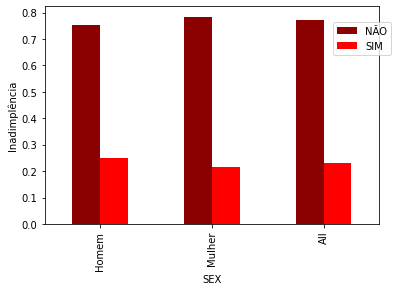

In [94]:
# Sexo X Inadimplência - Qualitativa X Qualitativa
sexo_x_in = pd.crosstab(train['SEX'], train['default.payment.next.month'], normalize='index', margins=True)
print(sexo_x_in)

cores = ['darkred','red','yellow','green','darkgreen']

sexo_x_in.plot.bar(color = cores)
plt.ylabel('Inadimplência')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

default.payment.next.month       NÃO       SIM
EDUCATION                                     
desconhecido1               1.000000  0.000000
Pós Graduação               0.797354  0.202646
Graduação                   0.757514  0.242486
Ensino Médio                0.739170  0.260830
outros                      0.969231  0.030769
desconhecidos2              0.932927  0.067073
desconhecidos3              0.935484  0.064516
All                         0.771103  0.228897


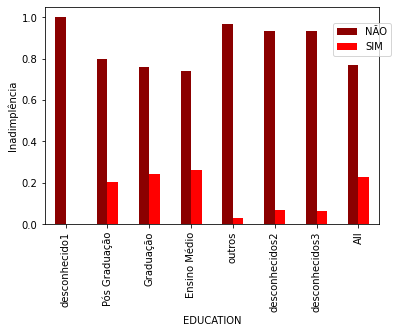

In [95]:
# Educação X Inadimplência 
ed_x_in = pd.crosstab(train['EDUCATION'], train['default.payment.next.month'], normalize='index', margins=True)
print(ed_x_in)

cores = ['darkred','red','yellow','green','darkgreen', 'purple', 'pink']

ed_x_in.plot.bar(color = cores)
plt.ylabel('Inadimplência')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()